In [1]:
# @title Install necessary packages.
#!pip install -U dopamine-rl

In [2]:
# @title Necessary imports and globals.

import numpy as np
import os
import pandas as pd
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

K = 1
BASE_PATH = 'results/results/K={}'.format(K)  # @param
GAME = 'Pong'  # @param
num_iterations = 50

In [3]:
# # @title Load baseline data
# !gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* baseline_results/
experimental_data = colab_utils.load_baselines('baseline_results')
experimental_data[GAME] = experimental_data[GAME][experimental_data[GAME]['iteration'] < num_iterations]

In [6]:
# @title Load the training logs.

for BETA in ['0.1', '1.0']:
    for RUN in ['1', '2', '3']:
        LOG_PATH = os.path.join(BASE_PATH, 'reg_weight={}'.format(BETA), GAME, RUN)
        reg_data = colab_utils.read_experiment(
            LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
        reg_data['agent'] = 'dqn-Reg: K={}, Beta={}'.format(K, BETA)
        reg_data['run_number'] = RUN
        # experimental_data[GAME] = experimental_data[GAME].merge(reg_data,
        #                                                        how='outer')
        experimental_data[GAME] = pd.concat([experimental_data[GAME], reg_data]) # sort=False

Reading statistics from: results/results/K=1/reg_weight=0.1/Pong/1//logs/log_49
Reading statistics from: results/results/K=1/reg_weight=0.1/Pong/2//logs/log_49
Reading statistics from: results/results/K=1/reg_weight=0.1/Pong/3//logs/log_49
Reading statistics from: results/results/K=1/reg_weight=1.0/Pong/1//logs/log_49
Reading statistics from: results/results/K=1/reg_weight=1.0/Pong/2//logs/log_49
Reading statistics from: results/results/K=1/reg_weight=1.0/Pong/3//logs/log_49


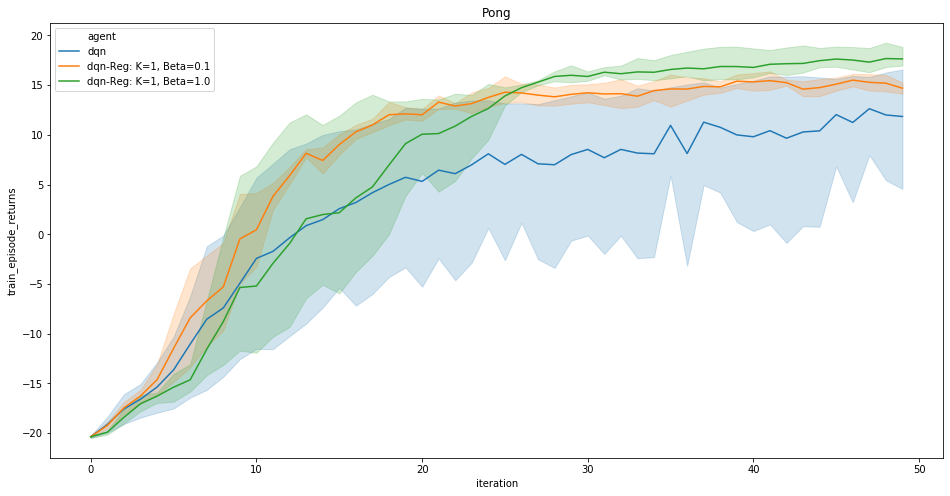

In [7]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(
    x='iteration', y='train_episode_returns', hue='agent',
    data=experimental_data[GAME], ax=ax)
plt.title(GAME)
plt.show()